In [1]:
import numpy as np
from sklearn.datasets import load_sample_image, load_sample_images
from skimage import io
import cv2
import inflect

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17, 6)

%matplotlib inline

## seaborn
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# HTML
from IPython.core.display import HTML
HTML("""<style>.output_png {    display: table-cell;    text-align: center;    vertical-align: middle;}</style>""")

<div class="alert alert-block alert-info">
<font size="+2"><b>
Morphological Transformations
</b></font>
</div>

A structuring element is a shape used for concluding how this shape fits or misses the shapes in the image. The most basic morphological operations are erosion and dilation used for
* Noise reduction
* Isolation of individual elements and joining disparate elements in an image.
* Finding of intensity bumps or holes in an image

## Dilation
This operation consists of convoluting an image with a kernel that has a defined anchor point, usually being the center of the kernel.

In OpenCV, dilating an image can be done using [dilate](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.erode#dilate). The function dilates the source image using the specified structuring element that determines the shape of a pixel neighborhood over which the maximum is taken:

$$\texttt{dst} (x,y) =  \max _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')$$


```python
cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst
```

**Parameters**:	
* src – input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F` or ``CV_64F.
* dst – output image of the same size and type as src.
* element – structuring element used for dilation; if element=Mat() , a 3 x 3 rectangular structuring element is used.
* anchor – position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
* iterations – number of times dilation is applied.
* borderType – pixel extrapolation method.
* borderValue – border value in case of a constant border.

<font color='Blue'><b>Example</b></font>:

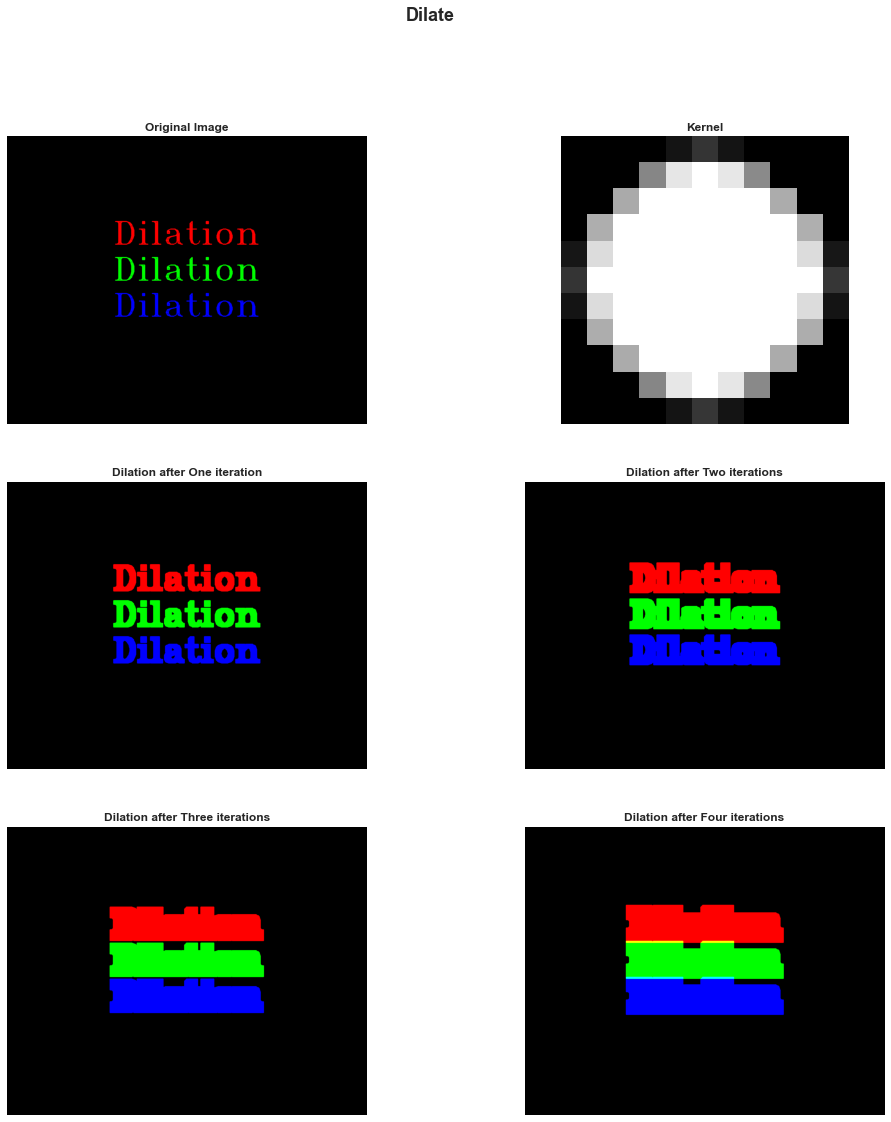

In [2]:
# Sample Image
Colors={'White':(255, 255, 255), 'Black':(0, 0, 0), 'Red':(255,0,0),'Green':(0,255,0), 'Blue':(0,0,255)}

Img = np.zeros((800, 1000, 3), np.uint8)
TXT = 'Dilation'
#### FontFace
FF = cv2.FONT_HERSHEY_TRIPLEX
#### Font thickness
thickness = 2
#### Font Scale
FS = 3

(label_width, label_height), _ = cv2.getTextSize(text = TXT, fontFace = FF, fontScale = FS, thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) - 100),
                   fontFace = FF, fontScale = FS, color = Colors['Red'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2)),
                  fontFace = FF, fontScale = 3, color = Colors['Green'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) + 100),
                  fontFace = FF, fontScale = 3, color = Colors['Blue'], thickness = thickness)
del FF, thickness, FS, label_width, label_height

## Kernel
kernel = np.ones((11, 11),np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0]/2), int(kernel.shape[1]/2)),
               int(min(kernel.shape)/2-min(kernel.shape)/10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots

rows = 3
fig, ax = plt.subplots(rows * 1, 2 , figsize = (17, rows* 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')

_ = fig.suptitle('Dilate', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', fontproperties=font, fontsize = 12)

## Dilation
IT = 4
for i in range(1, IT+1):
    Out = cv2.dilate(Img, kernel, iterations = i)
    _ = ax[i+1].imshow(Out)
    if i == 1:
        _ = ax[i+1].set_title('Dilation after %s iteration' % inflect.engine().number_to_words(i).title(),
                              fontproperties=font, fontsize = 12)
    else:
        _ = ax[i+1].set_title('Dilation after %s iterations' % inflect.engine().number_to_words(i).title(),
                              fontproperties=font, fontsize = 12)


for i in range(len(ax)):
    _ = ax[i].axis('off')
del i, rows
del Img, Out, ax, fig

## Erosion

The main difference between [Dilation](#Dilation) and [Erosion](#Erosion) is the way the output function is defined. Here, [erode](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.erode#erode) function erodes the source image using the specified structuring element that determines the shape of a pixel neighborhood over which the minimum is taken (in [Dilation](#Dilation), maximum is used instead!):

$$\texttt{dst} (x,y) =  \min _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')$$

```python
cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst
```

**Parameters**:	
* src – input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F` or ``CV_64F.
* dst – output image of the same size and type as src.
* element – structuring element used for erosion; if element=Mat() , a 3 x 3 rectangular structuring element is used.
* anchor – position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
* iterations – number of times erosion is applied.
* borderType – pixel extrapolation method.
* borderValue – border value in case of a constant border.

<font color='Blue'><b>Example</b></font>:

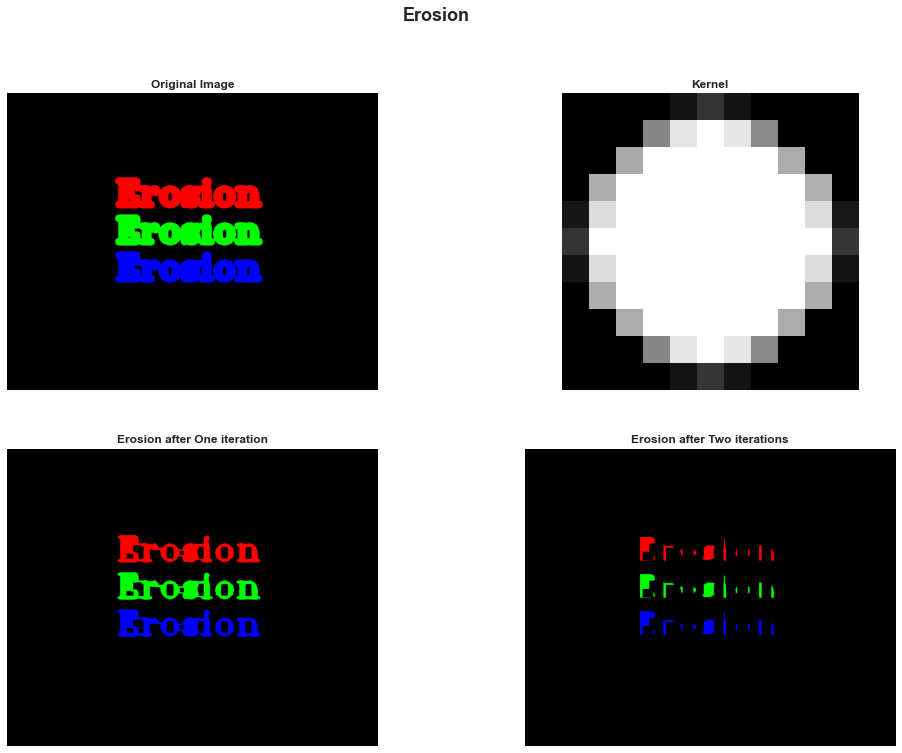

In [3]:
# Sample Image
Img = np.zeros((800, 1000, 3), np.uint8)
TXT = 'Erosion'
#### FontFace
FF = cv2.FONT_HERSHEY_TRIPLEX
#### Font thickness
thickness = 20
#### Font Scale
FS = 3

(label_width, label_height), _ = cv2.getTextSize(text = TXT, fontFace = FF, fontScale = FS, thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) - 100),
                   fontFace = FF, fontScale = FS, color = Colors['Red'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2)),
                  fontFace = FF, fontScale = 3, color = Colors['Green'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) + 100),
                  fontFace = FF, fontScale = 3, color = Colors['Blue'], thickness = thickness)
del FF, thickness, FS, label_width, label_height

## Kernel
kernel = np.ones((11, 11),np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0]/2), int(kernel.shape[1]/2)),
               int(min(kernel.shape)/2-min(kernel.shape)/10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots

rows = 2
fig, ax = plt.subplots(rows * 1, 2 , figsize = (17, rows* 6))
ax = ax.ravel()
_ = fig.suptitle('Erosion', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', fontproperties=font, fontsize = 12)

## Erosion
IT = 2
for i in range(1, IT+1):
    Out = cv2.erode(Img, kernel, iterations = i)
    _ = ax[i+1].imshow(Out)
    if i == 1:
        _ = ax[i+1].set_title('Erosion after %s iteration' % inflect.engine().number_to_words(i).title(),
                              fontproperties=font, fontsize = 12)
    else:
        _ = ax[i+1].set_title('Erosion after %s iterations' % inflect.engine().number_to_words(i).title(),
                              fontproperties=font, fontsize = 12)


for i in range(len(ax)):
    _ = ax[i].axis('off')
    
del i, rows
del Img, Out, ax, fig

## morphologyEx

We can also use morphologyEx function from the OpenCV to apply various morphological transformations.

```python
cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst
```

**Parameters**:	
* src – Source image. The number of channels can be arbitrary. The depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
* dst – Destination image of the same size and type as src .
* element – Structuring element.
* op – Type of a morphological operation that can be one of the following:
    * MORPH_OPEN - an opening operation
    * MORPH_CLOSE - a closing operation
    * MORPH_GRADIENT - a morphological gradient
    * MORPH_TOPHAT - “top hat”
    * MORPH_BLACKHAT - “black hat”
    * MORPH_HITMISS - “hit and miss”
* iterations – Number of times erosion and dilation are applied.
* borderType – Pixel extrapolation method. See borderInterpolate() for details.
* borderValue – Border value in case of a constant border. The default value has a special meaning.

### Opening Operation

It is obtained by the erosion of an image followed by a dilation.

$$\texttt{dst} = \mathrm{open} ( \texttt{src} , \texttt{element} )= \mathrm{dilate} ( \mathrm{erode} ( \texttt{src} , \texttt{element} ))$$

This is useful for removing small objects.

<font color='Blue'><b>Example</b></font>:

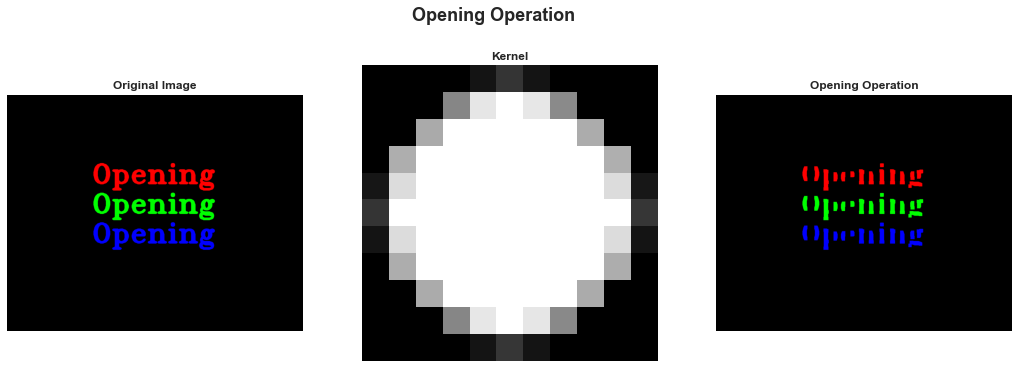

In [4]:
# Sample Image
Img = np.zeros((800, 1000, 3), np.uint8)
TXT = 'Opening'
#### FontFace
FF = cv2.FONT_HERSHEY_TRIPLEX
#### Font thickness
thickness = 8
#### Font Scale
FS = 3

(label_width, label_height), _ = cv2.getTextSize(text = TXT, fontFace = FF, fontScale = FS, thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) - 100),
                   fontFace = FF, fontScale = FS, color = Colors['Red'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2)),
                  fontFace = FF, fontScale = 3, color = Colors['Green'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) + 100),
                  fontFace = FF, fontScale = 3, color = Colors['Blue'], thickness = thickness)
del FF, thickness, FS, label_width, label_height

## Kernel
kernel = np.ones((11, 11),np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0]/2), int(kernel.shape[1]/2)),
               int(min(kernel.shape)/2-min(kernel.shape)/10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots

fig, ax = plt.subplots(1, 3 , figsize = (18, 6))
ax = ax.ravel()
_ = fig.suptitle('Opening Operation', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', fontproperties=font, fontsize = 12)

## Opening Operation

Out = cv2.morphologyEx(Img, cv2.MORPH_OPEN, kernel)
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Opening Operation', fontproperties=font, fontsize = 12)

for i in range(len(ax)):
    _ = ax[i].axis('off')
    
del i
del Img, Out, ax, fig

### Closing Operation

It is obtained by the dilation of an image followed by an erosion.

$$\texttt{dst} = \mathrm{close} ( \texttt{src} , \texttt{element} )= \mathrm{erode} ( \mathrm{dilate} ( \texttt{src} , \texttt{element} ))$$

<font color='Blue'><b>Example</b></font>:

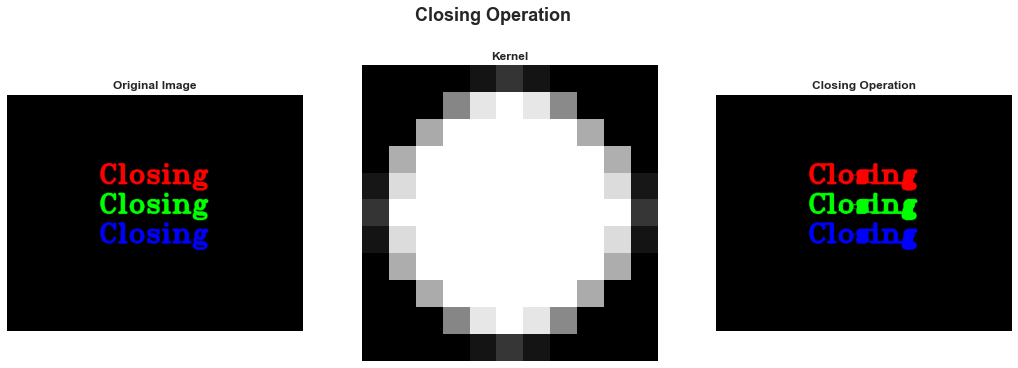

In [5]:
# Sample Image
Img = np.zeros((800, 1000, 3), np.uint8)
TXT = 'Closing'
#### FontFace
FF = cv2.FONT_HERSHEY_TRIPLEX
#### Font thickness
thickness = 8
#### Font Scale
FS = 3

(label_width, label_height), _ = cv2.getTextSize(text = TXT, fontFace = FF, fontScale = FS, thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) - 100),
                   fontFace = FF, fontScale = FS, color = Colors['Red'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2)),
                  fontFace = FF, fontScale = 3, color = Colors['Green'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) + 100),
                  fontFace = FF, fontScale = 3, color = Colors['Blue'], thickness = thickness)
del FF, thickness, FS, label_width, label_height

## Kernel
kernel = np.ones((11, 11),np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0]/2), int(kernel.shape[1]/2)),
               int(min(kernel.shape)/2-min(kernel.shape)/10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots

fig, ax = plt.subplots(1, 3 , figsize = (18, 6))
ax = ax.ravel()
_ = fig.suptitle('Closing Operation', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', fontproperties=font, fontsize = 12)

## Closing Operation

Out = cv2.morphologyEx(Img, cv2.MORPH_CLOSE, kernel)
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Closing Operation', fontproperties=font, fontsize = 12)

for i in range(len(ax)):
    _ = ax[i].axis('off')
    
del i
del Img, Out, ax, fig

### Morphological Gradient

It is the difference between the dilation and the erosion of an image.

$$\texttt{dst} = \mathrm{morph\_grad} ( \texttt{src} , \texttt{element} )= \mathrm{dilate} ( \texttt{src} , \texttt{element} )- \mathrm{erode} ( \texttt{src} , \texttt{element} )$$

<font color='Blue'><b>Example</b></font>:

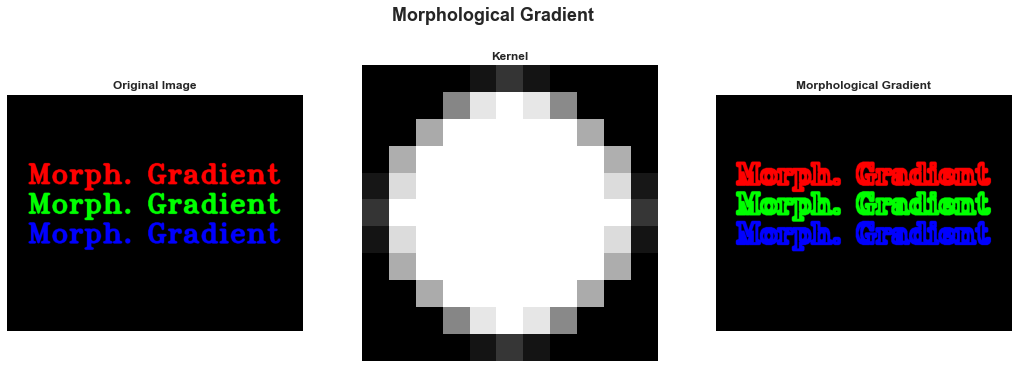

In [6]:
# Sample Image
Img = np.zeros((800, 1000, 3), np.uint8)
TXT = 'Morph. Gradient'
#### FontFace
FF = cv2.FONT_HERSHEY_TRIPLEX
#### Font thickness
thickness = 8
#### Font Scale
FS = 3

(label_width, label_height), _ = cv2.getTextSize(text = TXT, fontFace = FF, fontScale = FS, thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) - 100),
                   fontFace = FF, fontScale = FS, color = Colors['Red'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2)),
                  fontFace = FF, fontScale = 3, color = Colors['Green'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) + 100),
                  fontFace = FF, fontScale = 3, color = Colors['Blue'], thickness = thickness)
del FF, thickness, FS, label_width, label_height

## Kernel
kernel = np.ones((11, 11),np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0]/2), int(kernel.shape[1]/2)),
               int(min(kernel.shape)/2-min(kernel.shape)/10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots

fig, ax = plt.subplots(1, 3 , figsize = (18, 6))
ax = ax.ravel()
_ = fig.suptitle('Morphological Gradient', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', fontproperties=font, fontsize = 12)

## Morphological Gradient

Out = cv2.morphologyEx(Img, cv2.MORPH_GRADIENT, kernel)
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Morphological Gradient', fontproperties=font, fontsize = 12)

for i in range(len(ax)):
    _ = ax[i].axis('off')
    
del i
del Img, Out, ax, fig

### Top Hat

It is the difference between an input image and its opening.

$$\texttt{dst} = \mathrm{tophat} ( \texttt{src} , \texttt{element} )= \texttt{src} - \mathrm{open} ( \texttt{src} , \texttt{element} )$$

<font color='Blue'><b>Example</b></font>:

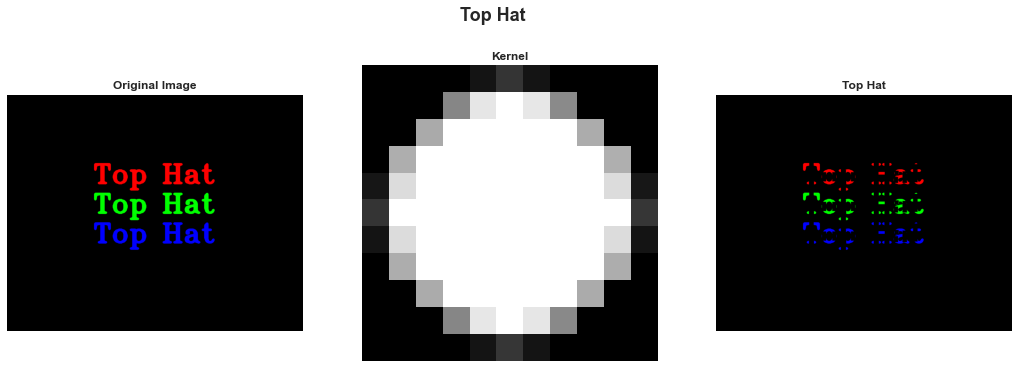

In [7]:
# Sample Image
Img = np.zeros((800, 1000, 3), np.uint8)
TXT = 'Top Hat'
#### FontFace
FF = cv2.FONT_HERSHEY_TRIPLEX
#### Font thickness
thickness = 8
#### Font Scale
FS = 3

(label_width, label_height), _ = cv2.getTextSize(text = TXT, fontFace = FF, fontScale = FS, thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) - 100),
                   fontFace = FF, fontScale = FS, color = Colors['Red'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2)),
                  fontFace = FF, fontScale = 3, color = Colors['Green'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) + 100),
                  fontFace = FF, fontScale = 3, color = Colors['Blue'], thickness = thickness)
del FF, thickness, FS, label_width, label_height

## Kernel
kernel = np.ones((11, 11),np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0]/2), int(kernel.shape[1]/2)),
               int(min(kernel.shape)/2-min(kernel.shape)/10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots

fig, ax = plt.subplots(1, 3 , figsize = (18, 6))
ax = ax.ravel()
_ = fig.suptitle('Top Hat', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', fontproperties=font, fontsize = 12)

## Top Hat

Out = cv2.morphologyEx(Img, cv2.MORPH_TOPHAT, kernel)
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Top Hat', fontproperties=font, fontsize = 12)

for i in range(len(ax)):
    _ = ax[i].axis('off')
    
del i
del Img, Out, ax, fig

### Black Hat

It is the difference between the closing of the input image and input image.

$$\texttt{dst} = \mathrm{blackhat} ( \texttt{src} , \texttt{element} )= \mathrm{close} ( \texttt{src} , \texttt{element} )- \texttt{src}$$

<font color='Blue'><b>Example</b></font>:

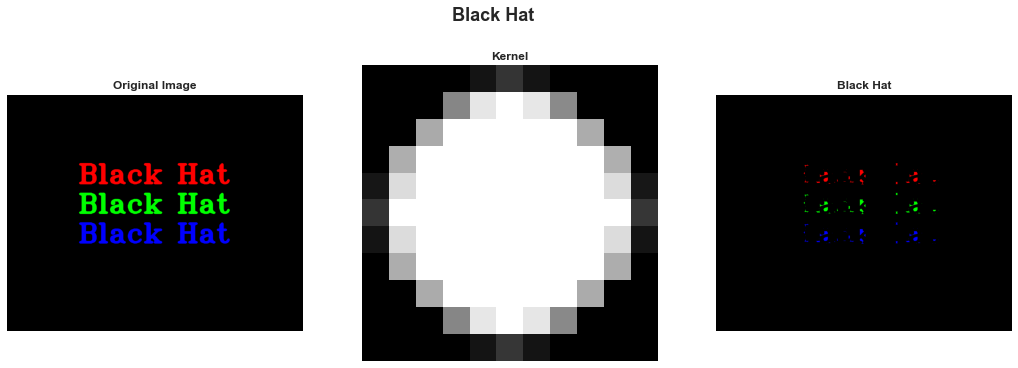

In [8]:
# Sample Image
Img = np.zeros((800, 1000, 3), np.uint8)
TXT = 'Black Hat'
#### FontFace
FF = cv2.FONT_HERSHEY_TRIPLEX
#### Font thickness
thickness = 8
#### Font Scale
FS = 3

(label_width, label_height), _ = cv2.getTextSize(text = TXT, fontFace = FF, fontScale = FS, thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) - 100),
                   fontFace = FF, fontScale = FS, color = Colors['Red'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2)),
                  fontFace = FF, fontScale = 3, color = Colors['Green'], thickness = thickness)

Img = cv2.putText(Img, text = TXT, org = (int((Img.shape[1]- label_width)/2), int(Img.shape[0]/2) + 100),
                  fontFace = FF, fontScale = 3, color = Colors['Blue'], thickness = thickness)
del FF, thickness, FS, label_width, label_height

## Kernel
kernel = np.ones((11, 11),np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0]/2), int(kernel.shape[1]/2)),
               int(min(kernel.shape)/2-min(kernel.shape)/10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots

fig, ax = plt.subplots(1, 3 , figsize = (18, 6))
ax = ax.ravel()
_ = fig.suptitle('Black Hat', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', fontproperties=font, fontsize = 12)

## Black Hat

Out = cv2.morphologyEx(Img, cv2.MORPH_BLACKHAT, kernel)
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Black Hat', fontproperties=font, fontsize = 12)

for i in range(len(ax)):
    _ = ax[i].axis('off')
    
del i
del Img, Out, ax, fig

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
1. [Morphological Transformations](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#morphological-transformations)
1. [Structuring element](https://en.wikipedia.org/wiki/Structuring_element)
***